# IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from itertools import product

C:\Users\prash\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



# READING DATA

In [2]:
data= pd.read_csv('yield.csv')
data.shape

(56717, 12)

In [3]:
data

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
...,...,...,...,...,...,...,...,...,...,...,...,...
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826


In [4]:
data['Domain Code'].value_counts()

QC    56717
Name: Domain Code, dtype: int64

In [5]:
data['Element'].value_counts()

Yield    56717
Name: Element, dtype: int64

In [6]:
data['Domain'].value_counts()

Crops    56717
Name: Domain, dtype: int64

In [7]:
data = data.rename(index=str, columns={"Value": "hg/ha_yield"})
data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [8]:
data = data.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
data.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [9]:
data.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [11]:
data_rain = pd.read_csv('rainfall.csv')
data_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [12]:
data_rain.shape

(6727, 3)

In [13]:
data_rain.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [14]:
data_rain = data_rain.rename(index=str, columns={" Area": 'Area'})

In [15]:
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [16]:
data_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(data_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
data_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [17]:
data_rain.shape

(6727, 3)

In [18]:
data_rain.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,5947.000000
mean,2001.354839,1124.743232
std,9.530114,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [19]:
data1 = pd.merge(data, data_rain, on=['Year','Area'])

In [20]:
data1.shape

(26105, 5)

In [21]:
data1.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [22]:
data1.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,26105.000000,26105.000000,25385.000000
mean,2001.256311,68642.204827,1254.849754
std,9.150699,74867.915296,804.449430
min,1985.000000,0.000000,51.000000
25%,1994.000000,17740.000000,630.000000
50%,2001.000000,39310.000000,1150.000000
75%,2009.000000,95556.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


In [23]:
data_pes = pd.read_csv('pesticides.csv')
data_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [24]:
data_pes.shape

(4349, 7)

In [25]:
data_pes = data_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
data_pes = data_pes.drop(['Element','Domain','Unit','Item'], axis=1)
data_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [26]:
data_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [27]:
data_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [28]:
data2 = pd.merge(data1, data_pes, on=['Year','Area'])
data2.shape

(19356, 6)

In [29]:
data2.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [30]:
data_temp=  pd.read_csv('temp.csv')

In [31]:
data_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [32]:
data_temp.shape

(71311, 3)

In [33]:
data_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [34]:
data_temp = data_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
data_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [35]:
data3 = pd.merge(data2,data_temp, on=['Area','Year'])
data3.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [36]:
data3.shape

(28248, 7)

# DATA PREPOCESSING

In [37]:
data3.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28242.00000,28248.000000,28248.000000
mean,2001.541950,77047.863282,1149.05598,37069.136973,20.543722
std,7.052997,84950.194454,709.81215,59954.787836,6.311828
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19918.750000,593.00000,1695.710000,16.710000
50%,2001.000000,38295.000000,1083.00000,17517.760000,21.510000
75%,2008.000000,104598.250000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [38]:
data3.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [39]:
data3.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    6
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [40]:
data3["average_rain_fall_mm_per_year"] = data3["average_rain_fall_mm_per_year"].fillna(data3["average_rain_fall_mm_per_year"].mean())

In [41]:
num_col=['average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp']
num_data=data3[num_col]

In [42]:
for col in num_data:

    q1=np.percentile(num_data[col],25) 
    q3=np.percentile(num_data[col],75)

    IQR=q3-q1
    
    print('Outliers for :',col,'\n')
  
    upper=q3+1.5*IQR

    lower=q1-1.5*IQR
   
    outliers=[]
    
    for i in num_data[col]:
        if(i<lower or i>upper):
            outliers.append(i)
    print("Outliers are:",outliers)
    print("\n")

Outliers for : average_rain_fall_mm_per_year 

Outliers are: []


Outliers for : pesticides_tonnes 

Outliers are: [136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 136185.08, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 171945.54, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 127585.0, 12

In [43]:
for col in num_data:
    tenth_percentile=np.percentile(num_data[col],10)
    ninetieth_percentile=np.percentile(num_data[col],90)
    print(tenth_percentile,ninetieth_percentile)
    num_data[col]=np.where(num_data[col]<tenth_percentile,tenth_percentile,num_data[col]) 
    num_data[col]=np.where(num_data[col]>ninetieth_percentile,ninetieth_percentile,num_data[col])

494.0 2274.0
148.68 79821.18
10.37 27.23


In [44]:
data3.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28248.00000,28248.000000,28248.000000
mean,2001.541950,77047.863282,1149.05598,37069.136973,20.543722
std,7.052997,84950.194454,709.73676,59954.787836,6.311828
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19918.750000,593.00000,1695.710000,16.710000
50%,2001.000000,38295.000000,1083.00000,17517.760000,21.510000
75%,2008.000000,104598.250000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [45]:
data3.dtypes

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [46]:
data3.nunique()

Area                               101
Item                                10
Year                                23
hg/ha_yield                      11516
average_rain_fall_mm_per_year      101
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64

# VISUALIZATION

In [47]:
data3.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

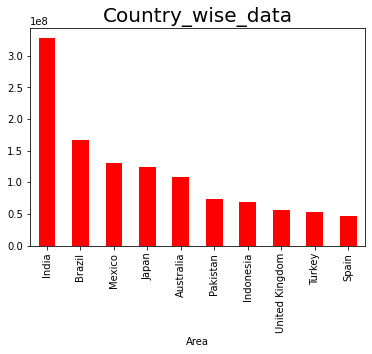

<Figure size 1440x1440 with 0 Axes>

In [48]:
data3.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10).plot(kind = "bar",cmap='flag')
plt.title('Country_wise_data',fontsize=20)
plt.figure(figsize = (20,20))
plt.show()

In [49]:
data3.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

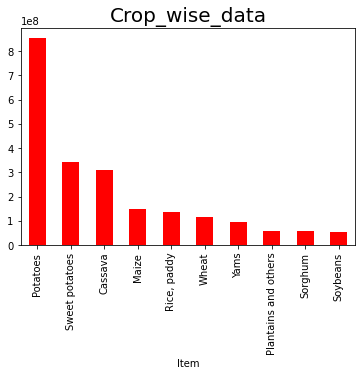

<Figure size 1440x1440 with 0 Axes>

In [50]:
data3.groupby(['Item'],sort=True)['hg/ha_yield'].sum().nlargest(10).plot(kind = "bar",cmap='flag')
plt.title('Crop_wise_data',fontsize=20)
plt.figure(figsize = (20,20))
plt.show()

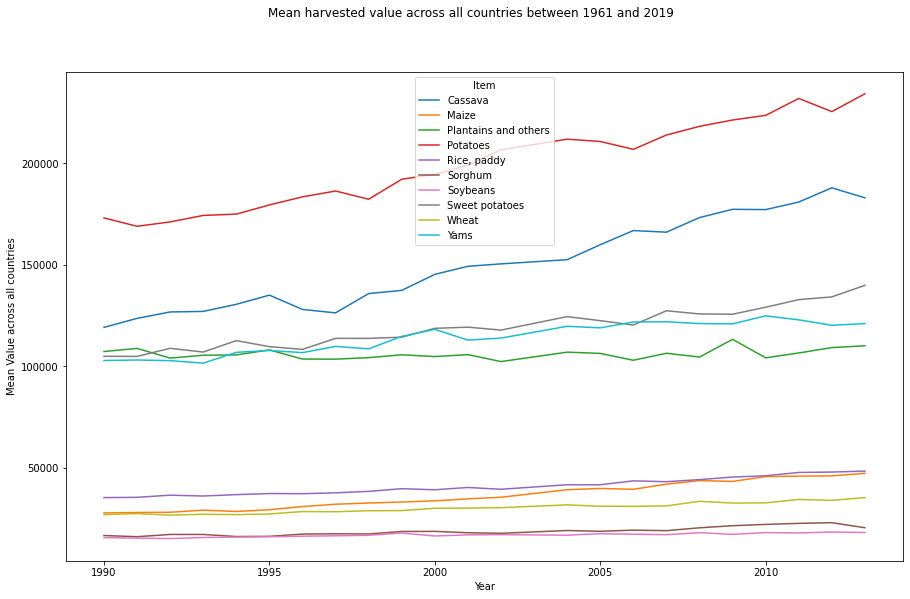

In [51]:
yield_mean = data3.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['hg/ha_yield'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

In [52]:
corr_matrrix=data3.corr()
print(corr_matrrix)

                                   Year  hg/ha_yield  \
Year                           1.000000     0.091703   
hg/ha_yield                    0.091703     1.000000   
average_rain_fall_mm_per_year -0.003797     0.000962   
pesticides_tonnes              0.141090     0.064120   
avg_temp                       0.014133    -0.114818   

                               average_rain_fall_mm_per_year  \
Year                                               -0.003797   
hg/ha_yield                                         0.000962   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.180976   
avg_temp                                            0.313017   

                               pesticides_tonnes  avg_temp  
Year                                    0.141090  0.014133  
hg/ha_yield                             0.064120 -0.114818  
average_rain_fall_mm_per_year           0.180976  0.313017  
pesticides_tonnes                 

<Axes: >

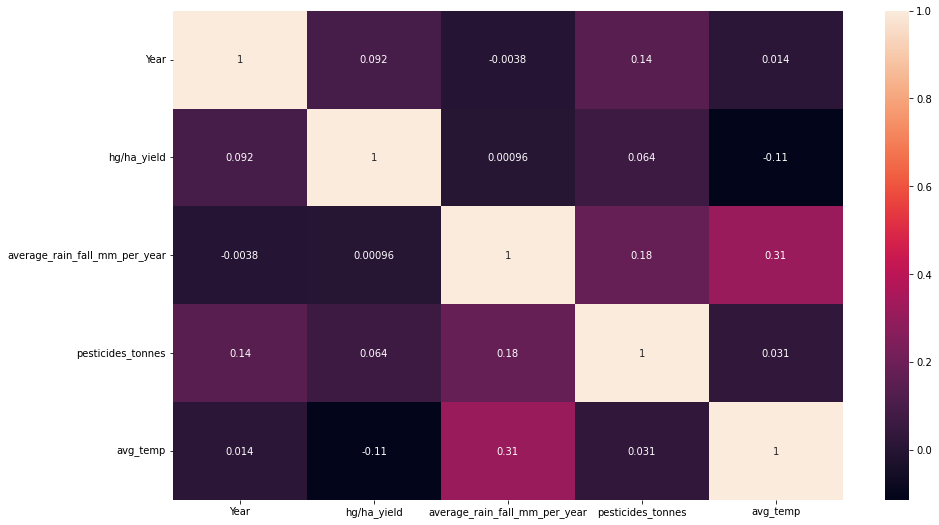

In [53]:
fig = plt.figure(figsize=(15,9))
sns.heatmap(corr_matrrix, xticklabels=corr_matrrix.columns, yticklabels=corr_matrrix.columns,annot=True)

In [53]:
new_data = pd.get_dummies(data3, columns=['Area',"Item"], prefix = ['Country',"Item"])
X=new_data.loc[:, new_data.columns != 'hg/ha_yield']
Y=data3['hg/ha_yield']


# TRAIN AND TEST SPLIT

In [54]:
def train_test_split(Data, test_ratio):
    
    Data=Data.sample(frac=1,random_state=42)

    samples=int(len(Data)*(1-test_ratio))

    train_data=Data[:samples]
    test_data=Data[samples:]

    return train_data, test_data

In [55]:
train_data, test_data = train_test_split(new_data, 0.3)

In [56]:
X_train,Y_train=train_data.loc[:,train_data.columns != 'hg/ha_yield'].values, train_data.loc[:,'hg/ha_yield'].values.reshape(-1,1)
X_test,Y_test=test_data.loc[:,test_data.columns != 'hg/ha_yield'].values, test_data.loc[:,'hg/ha_yield'].values.reshape(-1,1)

# NODE CLASS

In [81]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

# TREE CLASS

In [82]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split, max_depth,min_samples_leaf):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -1
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    

    def r_squared(self, y_true, y_pred):
        y_mean = np.mean(y_true)
        ss_tot = np.sum((y_true - y_mean) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2
    
    

# MODEL BUILDING AND TESTING

In [85]:
regressor = DecisionTreeRegressor(min_samples_leaf=1,min_samples_split=5, max_depth=14)
regressor.fit(X_train,Y_train)
regressor.print_tree()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 16911189.1875
                                                                                                                                                                                                                                                                left:X_0 <= 1990.0 ? 50400.0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                left:104002.0
                                                                                                                                                                              

In [86]:
y_pred = regressor.predict(X_test)

In [87]:
regressor.mse(Y_test,y_pred)

14630499278.267544

In [88]:
regressor.r_squared(Y_test,y_pred)

-16810.370053330716

In [89]:
y_pred1 = regressor.predict(X_train)

In [90]:
regressor.r_squared(Y_train,y_pred1)

-39105.1454852432

# HYPERPARAMETER TUNING

In [83]:
def grid_search(X_train, y_train, model_class, param_grid, cv=5):
    best_score = float('-inf')
    best_params = None
    
    for params in get_param_combinations(param_grid):
        scores = []
        
        for train_idxs, val_idxs in get_k_folds(len(X_train), cv):
            model = model_class(**params)
            model.fit(X_train[train_idxs], y_train[train_idxs])
            y_val_pred = model.predict(X_train[val_idxs])
            score = model.mse(y_train[val_idxs], y_val_pred)
            scores.append(score)
            
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = params
            
    return best_params, best_score

def get_param_combinations(param_grid):
    keys = param_grid.keys()
    values = param_grid.values()
    for combination in product(*values):
        yield dict(zip(keys, combination))

def get_k_folds(n_samples, k):
    idxs = np.arange(n_samples)
    fold_sizes = np.full(k, n_samples // k, dtype=int)
    fold_sizes[:n_samples % k] += 1
    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idxs = idxs[start:stop]
        train_idxs = np.concatenate((idxs[:start], idxs[stop:]))
        yield train_idxs, val_idxs
        current = stop

In [84]:
param_grid = {'max_depth': [4], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [5,10]}
best_params, best_score = grid_search(X_train, Y_train, DecisionTreeRegressor, param_grid, cv=5)
print('Best parameters:', best_params)
print('Best score:', best_score)

KeyboardInterrupt: 

In [65]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [66]:
dtr= DecisionTreeRegressor(max_depth=10,random_state=42)
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [67]:
y_pred = dtr.predict(X_test)

In [68]:
mean_squared_error(Y_test, y_pred)

537841594.0045515

In [69]:
r2 = r2_score(Y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.9270779885683547


In [70]:
y_train_pred = dtr.predict(X_train)
r2_train = r2_score(Y_train, y_train_pred)

print('Training R2 score:', r2_train)

Training R2 score: 0.9346984608140477


In [71]:
param_grid = {
    'max_depth': range(1,15,1),
    'min_samples_split': range(1,20,1),
    'min_samples_leaf': range(1,15,1)
}

In [72]:
grid_search = GridSearchCV(dtr, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(1, 20)})

In [73]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [74]:
best_regressor = DecisionTreeRegressor(**grid_search.best_params_)
best_regressor.fit(X_train, Y_train)

# Evaluate the model on the test set
y_pred = best_regressor.predict(X_test)
mse = np.mean((y_pred - Y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 14528159422.079565


In [76]:
r2 = r2_score(Y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.961226219040212


In [77]:
y_tarin_pred = best_regressor.predict(X_train)
mse = np.mean((y_train_pred - Y_train) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 13828915613.198982


In [78]:
r2_train = r2_score(Y_train, y_tarin_pred)
print("R2 score:", r2_train)

R2 score: 0.9720989710469401
